<a href="https://colab.research.google.com/github/jcordonez20/CSST-101/blob/main/3B_ORDONEZ_EXER4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EXERCISE 1: Setting up the environment**

**1. Install the Required Library:**

In [1]:
!pip install pgmpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 20.8 MB/s eta 0:00:00


**2. Import Libraries**

In [2]:
import numpy as np
import pandas as pd
from pgmpy.models import BayesianModel
from pgmpy.inference import VariableElimination
from pgmpy.inference import BeliefPropagation
from pgmpy.factors.discrete import TabularCPD

# **EXECISE 2: Building a Simple Bayesian Network**

**1. Define the Structure**

In [3]:
model = BayesianModel([('Weather', 'Traffuc'), ('Traffic', 'Late')])

**2. Define Conditional Probability Tables**

In [4]:
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD

model = BayesianModel([('Weather', 'Traffic'), ('Traffic', 'Late')])

cpd_weather = TabularCPD(variable = 'Weather', variable_card = 2, values = [[0.8], [0.2]])

cpd_traffic = TabularCPD(variable = 'Traffic', variable_card = 2,
                         values = [[0.9, 0.5],[0.1, 0.5]],
                         evidence = ['Weather'],
                         evidence_card = [2])

cpd_late = TabularCPD(variable = 'Late', variable_card = 2,
                      values = [[0.95, 0.4], [0.05, 0.6]],
                      evidence = ['Traffic'],
                      evidence_card = [2])

model.add_cpds(cpd_weather, cpd_traffic, cpd_late)

assert model.check_model()

# **EXERCISE 3: Querying the Bayesian Network**

**1. Perform Exact Inference:**

In [5]:
inference = VariableElimination(model)

result = inference.query(variables = ['Late'], evidence = {'Weather': 1})
print(result)

+---------+-------------+
| Late    |   phi(Late) |
+=========+=============+
| Late(0) |      0.6750 |
+---------+-------------+
| Late(1) |      0.3250 |
+---------+-------------+


# **EXERCISE 4: Parameter Learning**

**1. Simulate a Dataset**

In [6]:
data = pd.DataFrame({
    'Weather' : np.random.choice([0,1], size = 1000, p = [0.8, 0.2]),
    'Traffic' : np.nan,
    'Late' : np.nan
})


data.loc[data['Weather'] == 0, 'Traffic'] = np.random.choice(
    [0,1],
    size = data[data['Weather'] == 0].shape[0],
    p = [0.9, 0.1]
)

data.loc[data['Weather'] == 1, 'Traffic'] = np.random.choice(
    [0,1],
    size = data[data['Weather'] == 1].shape[0],
    p = [0.5, 0.5]
)


data['Late'] = np.where(
    data['Traffic'] == 0,
    np.random.choice([0,1], size = data.shape[0], p = [0.95, 0.05]),
    np.random.choice([0,1], size = data.shape[0], p = [0.4, 0.6])
)

**2. Estimate the Parameters:**

In [7]:
from pgmpy.estimators import MaximumLikelihoodEstimator

model = BayesianModel([('Weather', 'Traffic'),('Traffic', 'Late')])

model.fit(data, estimator = MaximumLikelihoodEstimator)

for cpd in model.get_cpds():
  print(cpd)

+------------+-------+
| Weather(0) | 0.796 |
+------------+-------+
| Weather(1) | 0.204 |
+------------+-------+
+--------------+---------------------+---------------------+
| Weather      | Weather(0)          | Weather(1)          |
+--------------+---------------------+---------------------+
| Traffic(0.0) | 0.9221105527638191  | 0.5441176470588235  |
+--------------+---------------------+---------------------+
| Traffic(1.0) | 0.07788944723618091 | 0.45588235294117646 |
+--------------+---------------------+---------------------+
+---------+---------------------+---------------------+
| Traffic | Traffic(0.0)        | Traffic(1.0)        |
+---------+---------------------+---------------------+
| Late(0) | 0.9443786982248521  | 0.34838709677419355 |
+---------+---------------------+---------------------+
| Late(1) | 0.05562130177514793 | 0.6516129032258065  |
+---------+---------------------+---------------------+


# **EXERCISE 5: Visualizing the Bayesian Network**

**1. Visualize the Network Structure:**

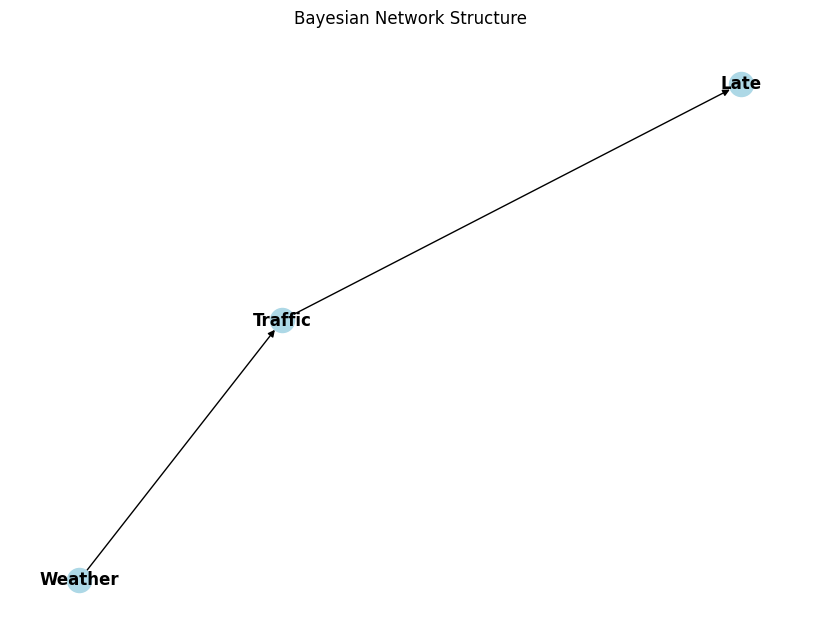

In [8]:
import matplotlib.pyplot as plt
import networkx as nx
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD

nx_graph = nx.DiGraph(model.edges())

plt.figure(figsize = (8,6))
pos = nx.spring_layout(nx_graph)
nx.draw(
    nx_graph, pos,
    with_labels = True, node_color = 'lightblue',
    font_weight = 'bold', arrows = True
)
plt.title('Bayesian Network Structure')
plt.show()